## Info
Upload the ChopstickPlayer.onnx file then run all to see results

## Model reference

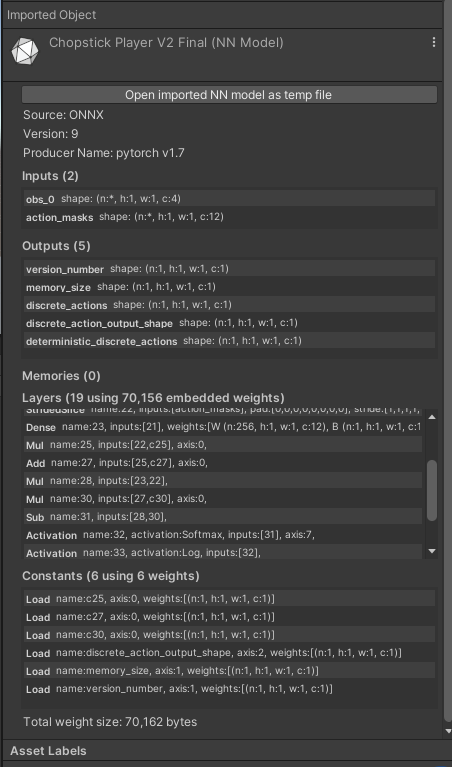

In the inputs, the obs_0 is the 4 inputs of the model for the 4 numbers on the hands. The action_masks are the action masks given to the model

In the outputs, we want the output discrete action, which is found in a 1 element array under discrete_actions

## Moves reference

attack [4 actions]
0.   1L - 2L
1.   1L - 2R
2.   1R - 2L
3.   1R - 2R

split  [8 actions]
- move 1-3 from L-R (3*1 = 3 moves)
  4.   1 L-R
  5.   2 L-R
  6.   3 L-R

- move 1-3 from R-L (3*1 = 3 moves)
  7.   1 R-L
  8.   2 R-L
  9.   3 R-L

self add  [2 actions]
10.   1L - 1R
11.   1R - 1L

In [1]:
!pip install onnx onnxruntime opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import onnx

onnx_model = onnx.load("/content/ChopstickPlayer.onnx")


In [3]:
import onnxruntime as ort

session = ort.InferenceSession("/content/ChopstickPlayer.onnx")


In [4]:
import numpy as np
import onnxruntime as ort

# Print the input names
input_names = [input.name for input in session.get_inputs()]
print("Input names:", input_names)

# Define the input data
input_data = np.array([[0.5, 0.5, 0.5, 0.25]], dtype=np.float32)

# Define the action mask
action_mask = np.ones((1, 12), dtype=np.float32)
action_mask[:, [0, 1, 2, 9]] = 0.0  # Set the mask for actions 1, 2, and 10 to 0.0

# Run the model
output = session.run(None, {'obs_0': input_data, 'action_masks': action_mask})

# Get the output data
output_data = output[2]

print(output)

print(output_data)


Input names: ['obs_0', 'action_masks']
[array([3.], dtype=float32), array([0.], dtype=float32), array([[7]], dtype=int64), array([[12.]], dtype=float32), array([[7]], dtype=int64)]
[[7]]


### Another test input
Test with input 12-32

In [5]:
import numpy as np
import onnxruntime as ort

# Print the input names
input_names = [input.name for input in session.get_inputs()]
print("Input names:", input_names)

# Define the input data
input_data = np.array([[1/4, 2/4, 3/4, 2/4]], dtype=np.float32)

# Define the action mask
action_mask = np.ones((1, 12), dtype=np.float32)
action_mask[:, [4, 5, 6, 8, 9]] = 0.0  # Set the mask for invalid actions to false

# Run the model
output = session.run(None, {'obs_0': input_data, 'action_masks': action_mask})

# Get the output data
output_data = output[2]

print(output)

print(output_data)


Input names: ['obs_0', 'action_masks']
[array([3.], dtype=float32), array([0.], dtype=float32), array([[7]], dtype=int64), array([[12.]], dtype=float32), array([[7]], dtype=int64)]
[[7]]


In [6]:
import numpy as np
import onnxruntime as ort

# Print the input names
input_names = [input.name for input in session.get_inputs()]
print("Input names:", input_names)

# Define the input data
input_data = np.array([[1/4, 2/4, 3/4, 2/4]], dtype=np.float32)

# Define the action mask
action_mask = np.zeros((1, 12), dtype=np.float32)
action_mask[:, [10, 11]] = 1.0  # Set only restricted actions true


# Run the model
output = session.run(None, {'obs_0': input_data, 'action_masks': action_mask})

# Get the output data
output_data = output[2] 
# the third (index 2) is the discrete_actions array, 
# which has 1 element, the predicted move

print(output)

print(output_data)

Input names: ['obs_0', 'action_masks']
[array([3.], dtype=float32), array([0.], dtype=float32), array([[10]], dtype=int64), array([[12.]], dtype=float32), array([[10]], dtype=int64)]
[[10]]
